In [3]:
import os
import getpass
import numpy as np
import pandas as pd
from time import time
from functools import reduce
import matplotlib.pyplot as plt

# Sklearn
from sklearn.impute import SimpleImputer

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Own Liberay
import PCR_model as model

# PCR - Principal component regression

## Data processing


In [6]:
# Gå et niveau op og naviger til mappen "Data"
os.chdir('../Data')

### 1. Load data

In [8]:
# Import features
file_path = 'Merged_dataset.csv'
df = pd.read_csv("merged_dataset.csv", sep=";", parse_dates=["Date"])
df.set_index("Date", inplace=True)
df.shape

(156, 267)

In [9]:
y = df.iloc[:, 0]   # første kolonne = inflation
X = df.iloc[:, 1:]  # resten = forklarende variable

# Tjek dimensioner
print("y shape:", y.shape)
print("X shape:", X.shape)

y shape: (156,)
X shape: (156, 266)


### 2. Imputer manglende værdier

In [11]:
imputer = SimpleImputer(strategy="median")  # Eller "median"

X_imputed = imputer.fit_transform(X)  # Imputer NaN i hele datasættet

# Konverter tilbage til DataFrame med kolonnenavne
X = pd.DataFrame(X_imputed, columns=X.columns, index = df.index)

### 3. Standardiser data 

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Forecast

In [15]:
df_pcr_rolling_forecast  = model.pcr_forecaster(X=X, 
                      y=y, 
                      forecast_horizon = 12, 
                      last_observation_date="2024-12-01", 
                      scaler=scaler, 
                      window_length=108,
                      variance_threshold=0.999, 
                      verbose=True)


=== Horizon h=0 ===
Explained variance (k=92): 99.91%
Training obs: 108 | Components used: 92

=== Horizon h=1 ===
Explained variance (k=92): 99.91%
Training obs: 107 | Components used: 92

=== Horizon h=2 ===
Explained variance (k=91): 99.91%
Training obs: 106 | Components used: 91

=== Horizon h=3 ===
Explained variance (k=90): 99.91%
Training obs: 105 | Components used: 90

=== Horizon h=4 ===
Explained variance (k=89): 99.90%
Training obs: 104 | Components used: 89

=== Horizon h=5 ===
Explained variance (k=89): 99.91%
Training obs: 103 | Components used: 89

=== Horizon h=6 ===
Explained variance (k=88): 99.90%
Training obs: 102 | Components used: 88

=== Horizon h=7 ===
Explained variance (k=88): 99.91%
Training obs: 101 | Components used: 88

=== Horizon h=8 ===
Explained variance (k=87): 99.91%
Training obs: 100 | Components used: 87

=== Horizon h=9 ===
Explained variance (k=86): 99.90%
Training obs: 99 | Components used: 86

=== Horizon h=10 ===
Explained variance (k=86): 99

In [16]:
df_pcr_rolling_forecast

,Date,Inflation forecast,Horizon
0,2025-01-01,1.917448,0
1,2025-02-01,1.011396,1
2,2025-03-01,1.009355,2
3,2025-04-01,2.888960,3
4,2025-05-01,1.249847,4
5,2025-06-01,1.337562,5
6,2025-07-01,0.854757,6
7,2025-08-01,2.156690,7
8,2025-09-01,3.655178,8
9,2025-10-01,2.619334,9


# Forcasting model with a rolling window

In [18]:
forecast_results = model.run_rolling_forecast(X, y, forecast_horizon=12, start_date="2023-01-01", end_date="2024-12-01")

In [19]:
eval_df, merged_df = model.evaluate_forecasts(forecast_results, y)
eval_df

,Horizon,MAE,RMSE,N_obs
0,0,0.686182,0.911395,23
1,1,1.364201,1.817629,22
2,2,1.624617,2.173693,21
3,3,1.866071,2.540984,20
4,4,1.869939,2.595505,19
5,5,1.677892,2.518430,18
6,6,2.176806,3.071093,17
7,7,2.483757,3.563316,16
8,8,2.552788,3.832985,15
9,9,2.368112,3.763195,14


In [20]:
h1 = merged_df[merged_df["Horizon"] == 0]
h1

,Date,Inflation forecast,Horizon,Forecast_made_in,y_true,error,abs_error,squared_error
0,2023-02-01,7.719423,0,2023-01-01,7.601,0.118423,0.118423,0.014024
12,2023-03-01,7.670134,0,2023-02-01,6.733,0.937134,0.937134,0.878220
24,2023-04-01,6.820786,0,2023-03-01,5.282,1.538786,1.538786,2.367861
36,2023-05-01,5.248656,0,2023-04-01,2.928,2.320656,2.320656,5.385445
48,2023-06-01,3.387316,0,2023-05-01,2.465,0.922316,0.922316,0.850666
60,2023-07-01,2.479113,0,2023-06-01,3.133,-0.653887,0.653887,0.427568
72,2023-08-01,3.143323,0,2023-07-01,2.437,0.706323,0.706323,0.498892
84,2023-09-01,2.478308,0,2023-08-01,0.859,1.619308,1.619308,2.622158
96,2023-10-01,1.408362,0,2023-09-01,0.085,1.323362,1.323362,1.751288
108,2023-11-01,0.091858,0,2023-10-01,0.600,-0.508142,0.508142,0.258208


In [21]:
sum_r = h1["Inflation forecast"].iloc[11:24].sum() / 12
sum_t = h1["y_true"].iloc[11:24].sum() / 12
print(sum_r)
print(sum_t)

1.203885993206014
1.3736666666666668


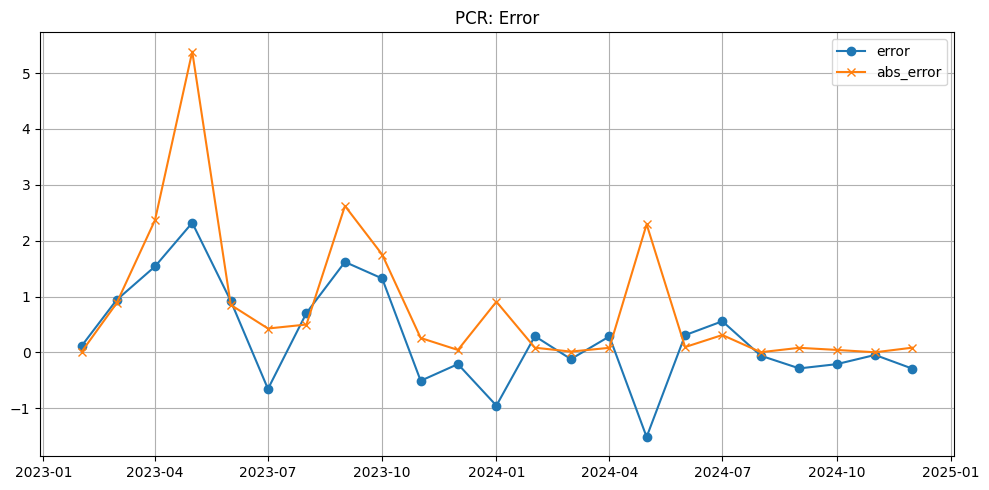

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(h1["Date"], h1["error"], label="error", marker="o")
plt.plot(h1["Date"], h1["squared_error"], label="abs_error", marker="x")
plt.legend()
plt.title("PCR: Error")
plt.grid(True)
plt.tight_layout()
plt.show()

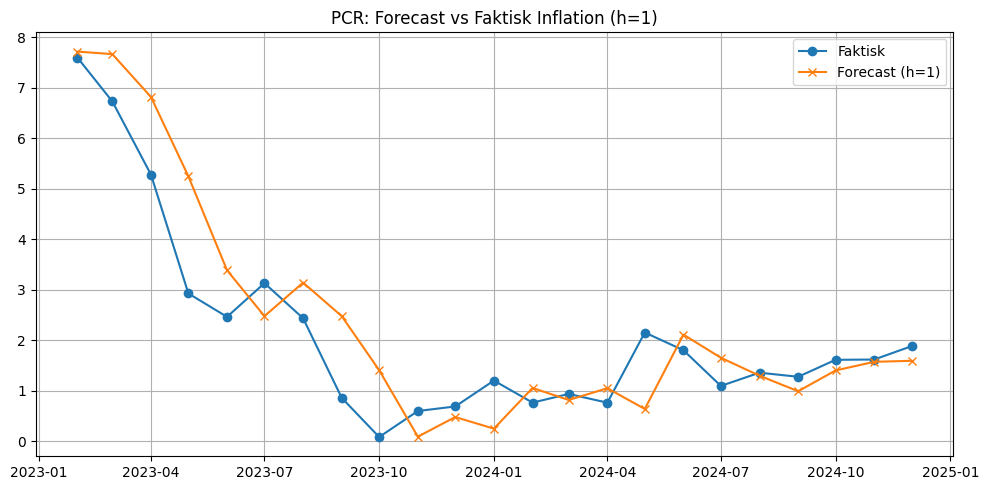

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(h1["Date"], h1["y_true"], label="Faktisk", marker="o")
plt.plot(h1["Date"], h1["Inflation forecast"], label="Forecast (h=1)", marker="x")
plt.legend()
plt.title("PCR: Forecast vs Faktisk Inflation (h=1)")
plt.grid(True)
plt.tight_layout()
plt.show()